
# CODE TO DETECT SPAM E-MAILS USING NAIVE BAYES
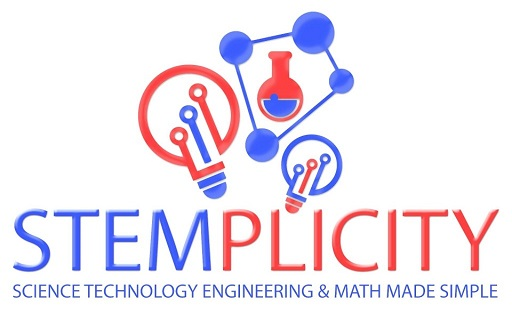

# PROBLEM STATEMENT

- The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

- The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.


# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP #1: IMPORT DATASET

In [2]:
spam_df = pd.read_csv("emails.csv")

In [3]:
spam_df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [4]:
spam_df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [5]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
text    5728 non-null object
spam    5728 non-null int64
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


# STEP #2: VISUALIZE DATASET

In [7]:
# Let's see which message is the most popular ham/spam message
spam_df.groupby('spam').describe()

text                                                               
     count unique                                                top freq
spam                                                                     
0     4360   4327  Subject: term project :  this is the list of p...    2
1     1368   1368  Subject: no need to pay more - cheapest oem on...    1

In [38]:
# Let's get the length of the messages
spam_df['length'] = spam_df['text'].apply(len)
spam_df.head()


,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [39]:
spam_df

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
5,"Subject: great nnews hello , welcome to medzo...",1,478
6,Subject: here ' s a hot play in motion homela...,1,9340
7,Subject: save your money buy getting this thin...,1,446
8,Subject: undeliverable : home based business f...,1,507
9,Subject: save your money buy getting this thin...,1,446


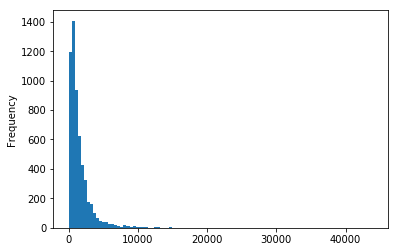

In [42]:
spam_df['length'].plot(bins=100, kind='hist') 

In [43]:
spam_df.length.describe()

count     5728.000000
mean      1556.768680
std       2042.649812
min         13.000000
25%        508.750000
50%        979.000000
75%       1894.250000
max      43952.000000
Name: length, dtype: float64

In [47]:
# Let's see the longest message 43952
spam_df[spam_df['length'] == 43952]['text'].iloc[0]

'Subject: from the enron india newsdesk - april 27 th newsclips  fyi news articles from indian press .  - - - - - - - - - - - - - - - - - - - - - - forwarded by sandeep kohli / enron _ development on 04 / 27 / 2001 08 : 24 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  nikita varma  04 / 27 / 2001 07 : 51 am  to : nikita varma / enron _ development @ enron _ development  cc : ( bcc : sandeep kohli / enron _ development )  subject : from the enron india newsdesk - april 27 th newsclips  friday apr 27 2001 , http : / / www . economictimes . com / today / cmo 3 . htm  dpc board empowers md to cancel mseb contract  friday apr 27 2001 , http : / / www . economictimes . com / today / 27 compl 1 . htm  mseb pays rs 134 cr under \' protest \' to dpc  friday , april 27 , 001 , http : / / www . businessstandard . com / today / economy 4 . asp ? menu = 3  enron india md authorised to terminate ppa  friday , april 27 , 2001 , http : / / www . financialexpress . com / fe 20010427 / topl 

In [48]:
# Let's divide the messages into spam and ham

In [49]:
ham = spam_df[spam_df['spam']==0]

In [50]:
spam = spam_df[spam_df['spam']==1]

In [51]:
ham

,text,spam,length
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0,1188
1369,Subject: sacramento weather station fyi - - ...,0,1997
1370,Subject: from the enron india newsdesk - jan 1...,0,7902
1371,Subject: re : powerisk 2001 - your invitation ...,0,3644
1372,Subject: re : resco database and customer capt...,0,5535
1373,Subject: ben zhang any suggestions ? - g - ...,0,1559
1374,Subject: manoj gupta - interview schedule att...,0,349
1375,Subject: re : hello from vince kaminski at enr...,0,6751
1376,Subject: candlestick charts fyi fallout - - ...,0,1196
1377,Subject: faculty information sheet mr . kamin...,0,1395


In [52]:
spam

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235
5,"Subject: great nnews hello , welcome to medzo...",1,478
6,Subject: here ' s a hot play in motion homela...,1,9340
7,Subject: save your money buy getting this thin...,1,446
8,Subject: undeliverable : home based business f...,1,507
9,Subject: save your money buy getting this thin...,1,446


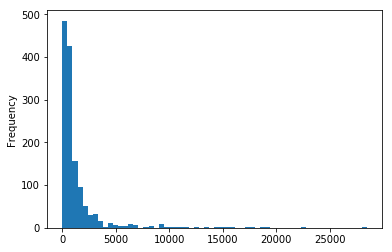

In [58]:
spam['length'].plot(bins=60, kind='hist') 

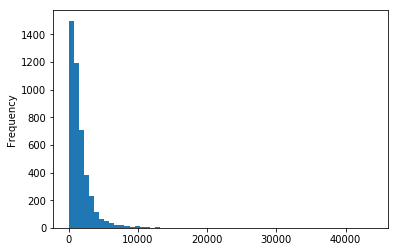

In [57]:
ham['length'].plot(bins=60, kind='hist') 

In [59]:
print( 'Spam percentage =', (len(spam) / len(spam_df) )*100,"%")

Spam percentage = 23.88268156424581 %


In [60]:
print( 'Ham percentage =', (len(ham) / len(spam_df) )*100,"%")

Ham percentage = 76.11731843575419 %


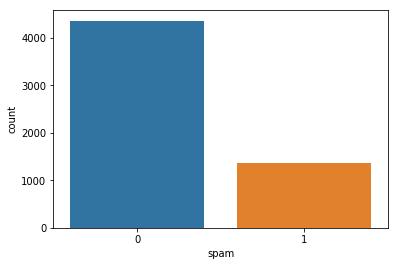

In [61]:
sns.countplot(spam_df['spam'], label = "Count") 

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [74]:
# Let's define a pipeline to clean up all the messages 
# The pipeline performs the following: (1) remove punctuation, (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [85]:
# Let's test the newly added function
spam_df_clean = spam_df['text'].apply(message_cleaning)

In [87]:
print(spam_df_clean[0])

['Subject', 'naturally', 'irresistible', 'corporate', 'identity', 'lt', 'really', 'hard', 'recollect', 'company', 'market', 'full', 'suqgestions', 'information', 'isoverwhelminq', 'good', 'catchy', 'logo', 'stylish', 'statlonery', 'outstanding', 'website', 'make', 'task', 'much', 'easier', 'promise', 'havinq', 'ordered', 'iogo', 'company', 'automaticaily', 'become', 'world', 'ieader', 'isguite', 'ciear', 'without', 'good', 'products', 'effective', 'business', 'organization', 'practicable', 'aim', 'hotat', 'nowadays', 'market', 'promise', 'marketing', 'efforts', 'become', 'much', 'effective', 'list', 'clear', 'benefits', 'creativeness', 'hand', 'made', 'original', 'logos', 'specially', 'done', 'reflect', 'distinctive', 'company', 'image', 'convenience', 'logo', 'stationery', 'provided', 'formats', 'easy', 'use', 'content', 'management', 'system', 'letsyou', 'change', 'website', 'content', 'even', 'structure', 'promptness', 'see', 'logo', 'drafts', 'within', 'three', 'business', 'days', 

In [82]:
print(spam_df['text'][0])

Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  mar

In [88]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])


In [89]:
print(vectorizer.get_feature_names())


['\x01', '\x02', '\x03', '\x05', '\x06', '\x07', '\x08', '\x0f', '\x10', '\x12', '\x14', '\x15', '\x19', '0', '00', '000', '0000', '000000', '00000000', '0000000000', '000000000003619', '000000000003991', '000000000003997', '000000000005168', '000000000005409', '000000000005411', '000000000005412', '000000000005413', '000000000005820', '000000000006238', '000000000006452', '000000000007494', '000000000007498', '000000000007876', '000000000010552', '000000000011185', '000000000012677', '000000000012734', '000000000012735', '000000000012736', '000000000012738', '000000000012741', '000000000012987', '000000000013085', '000000000013287', '000000000015384', '000000000015793', '000000000023619', '000000000024099', '000000000025307', '000000000025312', '000010220', '0000102317', '0000102374', '0000102789', '0000104281', '0000104282', '0000104486', '0000104631', '0000104730', '0000104776', '0000104778', '0000107043', '0000108729', '000066', '0001', '000166', '0002', '000202', '0003', '0004', '

In [90]:
print(spamham_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [91]:
spamham_countvectorizer.shape

(5728, 37229)

# STEP#4: TRAINING THE MODEL WITH ALL DATASET

In [92]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
label = spam_df['spam'].values
NB_classifier.fit(spamham_countvectorizer, label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [93]:
testing_sample = ['Free money!!!', "Hi Kim, Please let me know if you need any further information. Thanks"]
testing_sample_countvectorizer = vectorizer.transform(testing_sample)


In [94]:
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0], dtype=int64)

In [98]:
# Mini Challenge!
testing_sample = ['Hello, I am Ryan, I would like to book a hotel in Bali by January 24th', 'money viagara!!!!!']


In [99]:
testing_sample = ['money viagara!!!!!', "Hello, I am Ryan, I would like to book a hotel in SF by January 24th"]
testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0], dtype=int64)

# STEP#4: DIVIDE THE DATA INTO TRAINING AND TESTING PRIOR TO TRAINING

In [100]:
X = spamham_countvectorizer
y = label

In [101]:
X.shape

(5728, 37229)

In [102]:
y.shape

(5728,)

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [104]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [105]:
# from sklearn.naive_bayes import GaussianNB 
# NB_classifier = GaussianNB()
# NB_classifier.fit(X_train, y_train)

# STEP#5: EVALUATING THE MODEL 

In [106]:
from sklearn.metrics import classification_report, confusion_matrix


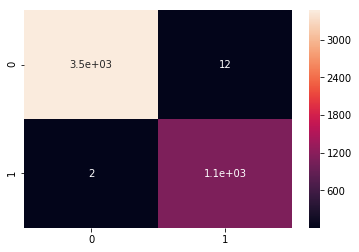

In [107]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

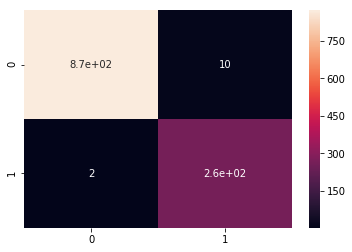

In [108]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [109]:
print(classification_report(y_test, y_predict_test))

             precision    recall  f1-score   support

          0       1.00      0.99      0.99       881
          1       0.96      0.99      0.98       265

avg / total       0.99      0.99      0.99      1146



In [142]:
spamham_countvectorizer

<5728x37229 sparse matrix of type '<class 'numpy.int64'>'
	with 565908 stored elements in Compressed Sparse Row format>

In [143]:
from sklearn.feature_extraction.text import TfidfTransformer

emails_tfidf = TfidfTransformer().fit_transform(spamham_countvectorizer)
print(emails_tfidf.shape)

(5728, 37229)


In [144]:
print(emails_tfidf[:,:])
# Sparse matrix with all the values of IF-IDF

  (0, 3638)	0.017223322243491098
  (0, 23369)	0.118508643434226
  (0, 18841)	0.13854196464928686
  (0, 10065)	0.07179540742040964
  (0, 17696)	0.08994844691767893
  (0, 21140)	0.10887020038606904
  (0, 27986)	0.06591875520600377
  (0, 16674)	0.07589064603185605
  (0, 28110)	0.11014658587128427
  (0, 9296)	0.16201763950655423
  (0, 21654)	0.11194202104978927
  (0, 15429)	0.06469325106427357
  (0, 32602)	0.11962021118089676
  (0, 18238)	0.043554647514359196
  (0, 18886)	0.13044694068717724
  (0, 16089)	0.09989038984521927
  (0, 8054)	0.11082209685254275
  (0, 20952)	0.25638370834223684
  (0, 32319)	0.11962021118089676
  (0, 31968)	0.118508643434226
  (0, 24838)	0.0889526018162803
  (0, 36025)	0.13193927309897757
  (0, 21431)	0.09506033522963935
  (0, 33037)	0.0949032879551913
  (0, 23040)	0.1086278114614957
  :	:
  (5727, 24818)	0.10165921849327718
  (5727, 21624)	0.0492955480245261
  (5727, 5729)	0.5517795052228944
  (5727, 30934)	0.05231956904321426
  (5727, 2828)	0.17444034391197472
 

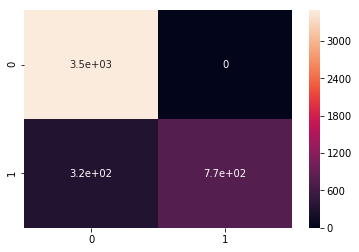

In [147]:
X = emails_tfidf
y = label

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

In [148]:
print(classification_report(y_test, y_predict_test))

             precision    recall  f1-score   support

          0       0.77      0.77      0.77       871
          1       0.27      0.27      0.27       275

avg / total       0.65      0.65      0.65      1146

